In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
#load data into pandas dataframe
df = pd.read_csv('ProphetData.csv')
#print first few lines of data
#note format of data
#Prophet API only accepts data in this format
df.head()

,ds,y
0,8/7/2019 10:00,21.906
1,8/7/2019 9:00,28.874
2,8/7/2019 8:00,33.087
3,8/7/2019 7:00,36.375
4,8/7/2019 6:00,35.021


In [0]:
#create instance of Prophet class
#w is a Prophet object
w = Prophet()
#fit Prophet object to training data
w.fit(df)
#construct dataframe for future with helper method .make_future_dataframe()
#must specify 'H' freq for hourly as default is daily data
#set periods to how many hours you want to predict for
future = w.make_future_dataframe(periods=720, freq='H')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
3643,2019-09-06 06:00:00
3644,2019-09-06 07:00:00
3645,2019-09-06 08:00:00
3646,2019-09-06 09:00:00
3647,2019-09-06 10:00:00


In [0]:
#forecast on future dataframe based on historical data
forecast = w.predict(future)
#print forecast values, where yhat is the predicted load
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3643,2019-09-06 06:00:00,33.004744,22.747217,43.895218
3644,2019-09-06 07:00:00,31.469622,21.088757,42.223316
3645,2019-09-06 08:00:00,26.443973,16.156047,36.291449
3646,2019-09-06 09:00:00,19.039735,9.802549,29.212413
3647,2019-09-06 10:00:00,12.060931,2.162796,21.940775


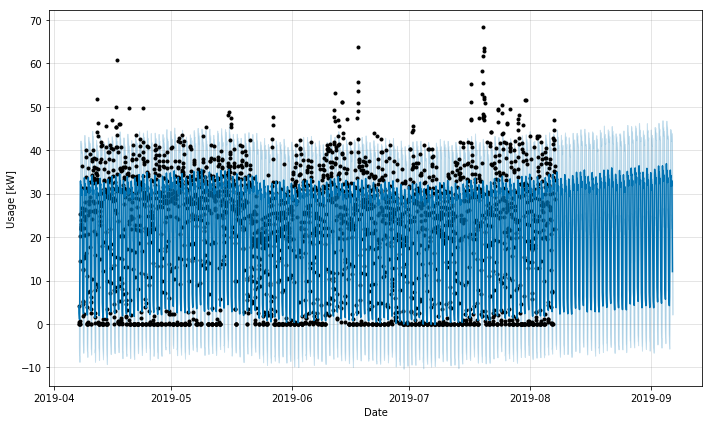

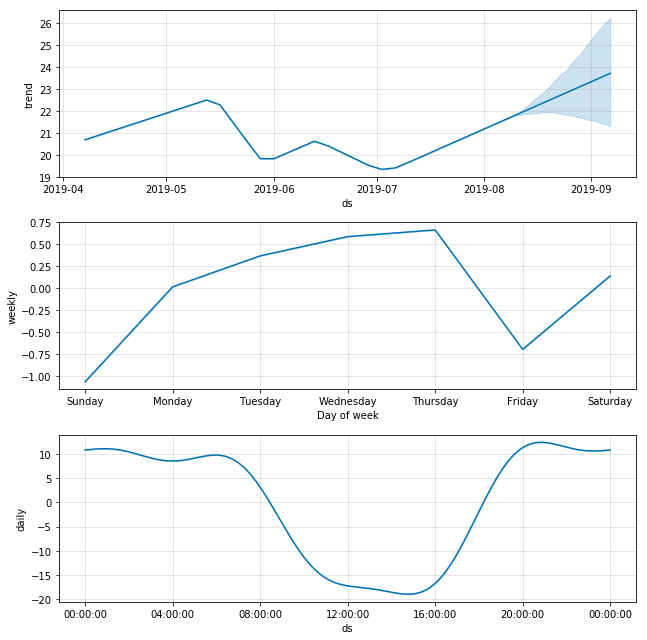

In [0]:
#plot forecast and breakdown of trends
fig1 = w.plot(forecast, xlabel='Date', ylabel='Usage [kW]')
fig2 = w.plot_components(forecast)
#save images
fig1.savefig('30dayLoadForecast')
fig2.savefig('30dayTrends')

In [0]:
#upload smaller data set to predict off for visual purposes
#also demonstrates ability of model to be accurate even with small datasets
df2 = pd.read_csv('2weekProphet - Sheet1.csv')
df2.head()

,ds,y
0,8/7/2019 10:00,21.906
1,8/7/2019 9:00,28.874
2,8/7/2019 8:00,33.087
3,8/7/2019 7:00,36.375
4,8/7/2019 6:00,35.021


In [0]:
#create instance of Prophet class
#p is a Prophet object
p = Prophet()
#train model with data
#note that weekly seasonality is automatically disabled for smaller dataset
p.fit(df2)
#construct dataframe for future with helper method .make_future_dataframe()
#creates dataframe for next 3 days, 72 hours at 'H' freq
future = p.make_future_dataframe(periods=72, freq='H')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds
403,2019-08-10 06:00:00
404,2019-08-10 07:00:00
405,2019-08-10 08:00:00
406,2019-08-10 09:00:00
407,2019-08-10 10:00:00


In [0]:
#forecast model on future dataframe
forecast = p.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
403,2019-08-10 06:00:00,30.848741,19.451286,40.418410
404,2019-08-10 07:00:00,28.543097,17.932256,39.514413
405,2019-08-10 08:00:00,23.856760,13.384239,34.488808
406,2019-08-10 09:00:00,17.144237,6.580085,27.280194
407,2019-08-10 10:00:00,10.422028,-0.482927,21.121776


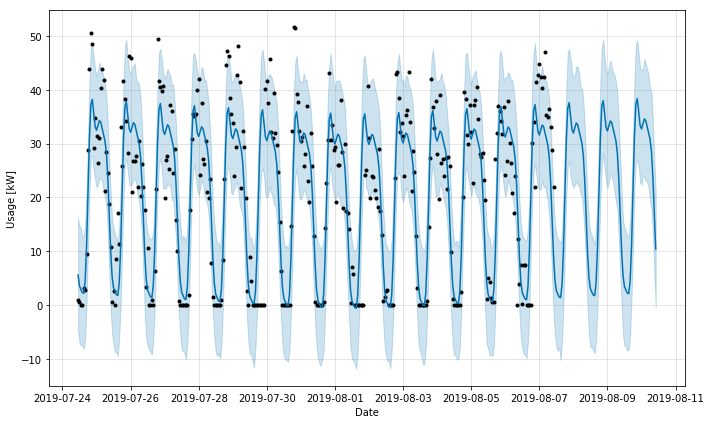

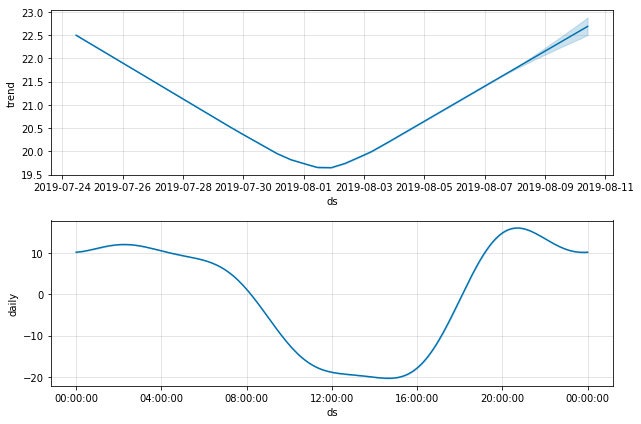

In [0]:
#plot forecast and trends
#note that a weekly trend can be extrapolated
#note that weekly trend is ignored in building model as it is a random function
#of variance inherent in dataset
fig3 = p.plot(forecast, xlabel='Date', ylabel='Usage [kW]')
fig4 = p.plot_components(forecast)
#save images
fig3.savefig('3LoadForecast')
fig4.savefig('3Trends')